# Portfolio ETF Analysis

## Data Loading & Prep

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../processed/etf_returns.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.head()

,Date,Adj_Close,Ticker,Market,Daily_Return,Cumulative_Return
0,2014-01-02,56.922413,BND,US,NaN,NaN
1,2014-01-03,56.929501,BND,US,0.000125,0.000125
2,2014-01-06,56.979229,BND,US,0.000874,0.000998
3,2014-01-07,57.050289,BND,US,0.001247,0.002247
4,2014-01-08,56.865547,BND,US,-0.003238,-0.000999


In [7]:
portfolio_weights = {
    "ZAG.TO" : 0.40,
    "XTI":0.30,
    "XIC.TO":0.20,
    "SPLV":0.10
}

In [8]:
def compute_portfolio_returns(df, weights):
    portfolio_df = df[df["Ticker"].isin(weights.keys())].copy()
    portfolio_df["Weight"] = portfolio_df["Ticker"].map(weights)
    
    daily_returns = (
        portfolio_df
        .assign(Weighted_Return=lambda x: x["Daily_Return"] * x["Weight"])
        .groupby("Date")["Weighted_Return"]
        .sum()
        .reset_index()
    )
    
    daily_returns["Cumulative_Return"] = (
        (1 + daily_returns["Weighted_Return"]).cumprod() - 1
    )
    
    return daily_returns

In [9]:
portfolio_full = compute_portfolio_returns(df, portfolio_weights)

In [10]:
recent_cutoff = portfolio_full["Date"].max() - pd.DateOffset(months=12)
portfolio_recent = portfolio_full[portfolio_full["Date"] >= recent_cutoff]

## Portfolio 1 – Conservative Allocation
- Definition
- Backtest
- Plot
- Interpretation

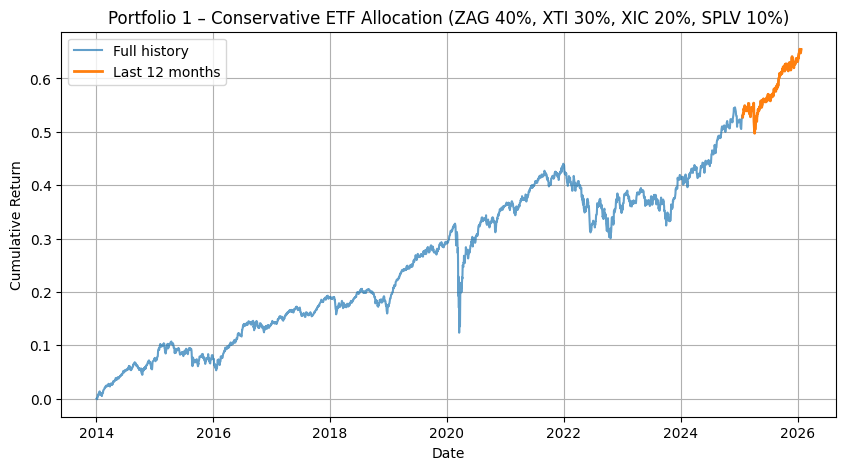

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(
    portfolio_full["Date"],
    portfolio_full["Cumulative_Return"],
    label="Full history",
    alpha=0.7
)

plt.plot(
    portfolio_recent["Date"],
    portfolio_recent["Cumulative_Return"],
    label="Last 12 months",
    linewidth=2
)

plt.title("Portfolio 1 – Conservative ETF Allocation (ZAG 40%, XTI 30%, XIC 20%, SPLV 10%)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

## Portfolio 2 – Growth-Oriented Allocation
- Definition
- Backtest
- Plot
- InterpretationPortfolio 2

In [17]:
portfolio2_weights = {
    "XTI" : 0.50, # US total market (growth engine)
    "VFC.TO" : 0.30, # S&P 500 exposure
    "XIC.TO" : 0.20, # Canadian equities
    "SPLV" : 0.10  # Low-vol equity to slightly dampen risk
}

In [18]:
portfolio2_df = df[df["Ticker"].isin(portfolio2_weights.keys())].copy()

portfolio2_df["Weight"] = portfolio2_df["Ticker"].map(portfolio2_weights)

portfolio2_df["Weighted_Return"] = (
    portfolio2_df["Daily_Return"] * portfolio2_df["Weight"]
)


In [19]:
portfolio2_daily = (
    portfolio2_df
    .groupby("Date")["Weighted_Return"]
    .sum()
    .reset_index()
)

In [25]:
portfolio2_daily["Cumulative_Return"] = (
    (1 + portfolio2_daily["Weighted_Return"]).cumprod() - 1
)

In [26]:
portfolio2_full = portfolio2_daily.copy()

cutoff_date = portfolio2_full["Date"].max() - pd.DateOffset(months=12)

portfolio2_recent = portfolio2_full[
    portfolio2_full["Date"] >= cutoff_date
]

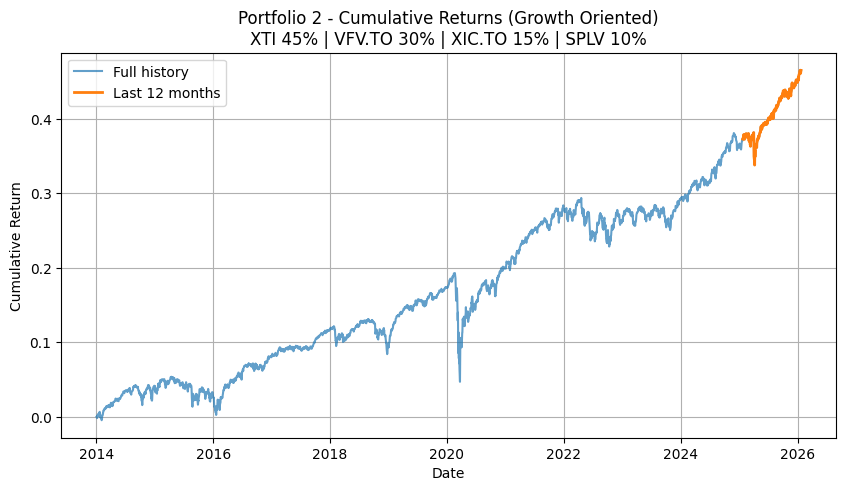

In [27]:
plt.figure(figsize=(10, 5))

plt.plot(
    portfolio2_full["Date"],
    portfolio2_full["Cumulative_Return"],
    label="Full history",
    alpha=0.7
)

plt.plot(
    portfolio2_recent["Date"],
    portfolio2_recent["Cumulative_Return"],
    label="Last 12 months",
    linewidth=2 
)

plt.title(
    "Portfolio 2 - Cumulative Returns (Growth Oriented)\n"
    "XTI 45% | VFV.TO 30% | XIC.TO 15% | SPLV 10%"
    )

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

## Portfolio 1 vs Portfolio 2

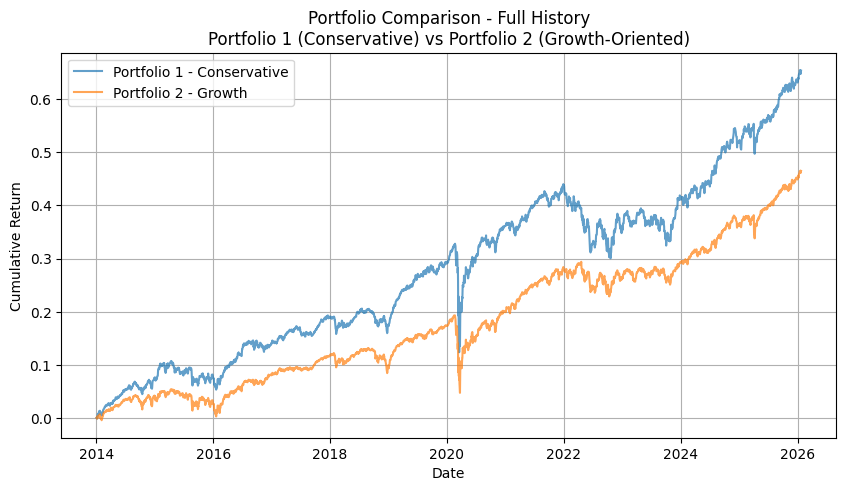

In [28]:
plt.figure(figsize=(10,5))

plt.plot(
    portfolio_full["Date"],
    portfolio_full["Cumulative_Return"],
    label="Portfolio 1 - Conservative",
    alpha=0.7
)

plt.plot(
    portfolio2_full["Date"],
    portfolio2_full["Cumulative_Return"],
    label="Portfolio 2 - Growth",
    alpha=0.7
)

plt.title(
    "Portfolio Comparison - Full History\n"
    "Portfolio 1 (Conservative) vs Portfolio 2 (Growth-Oriented)"
)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


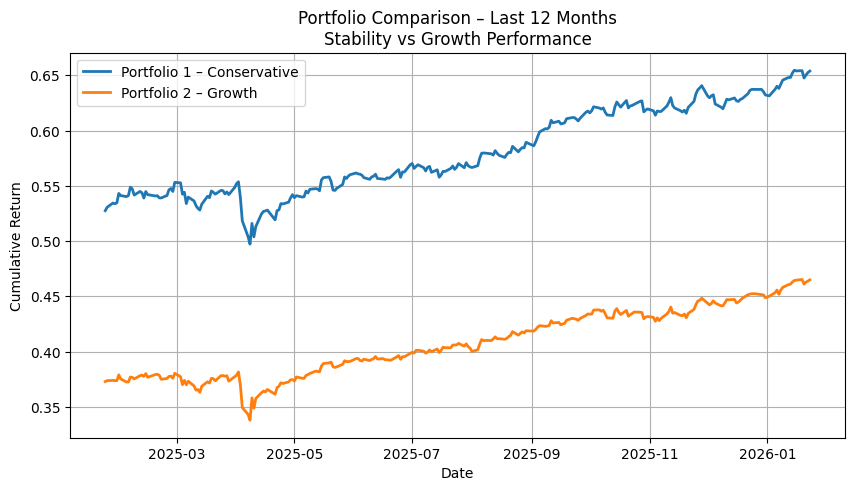

In [31]:
plt.figure(figsize=(10,5))

plt.plot(
    portfolio_recent["Date"],
    portfolio_recent["Cumulative_Return"],
    label="Portfolio 1 – Conservative",
    linewidth=2
)

plt.plot(
    portfolio2_recent["Date"],
    portfolio2_recent["Cumulative_Return"],
    label="Portfolio 2 – Growth",
    linewidth=2
)

plt.title(
    "Portfolio Comparison – Last 12 Months\n"
    "Stability vs Growth Performance"
)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()
